# Ejercicio entregable ETL (NBA)

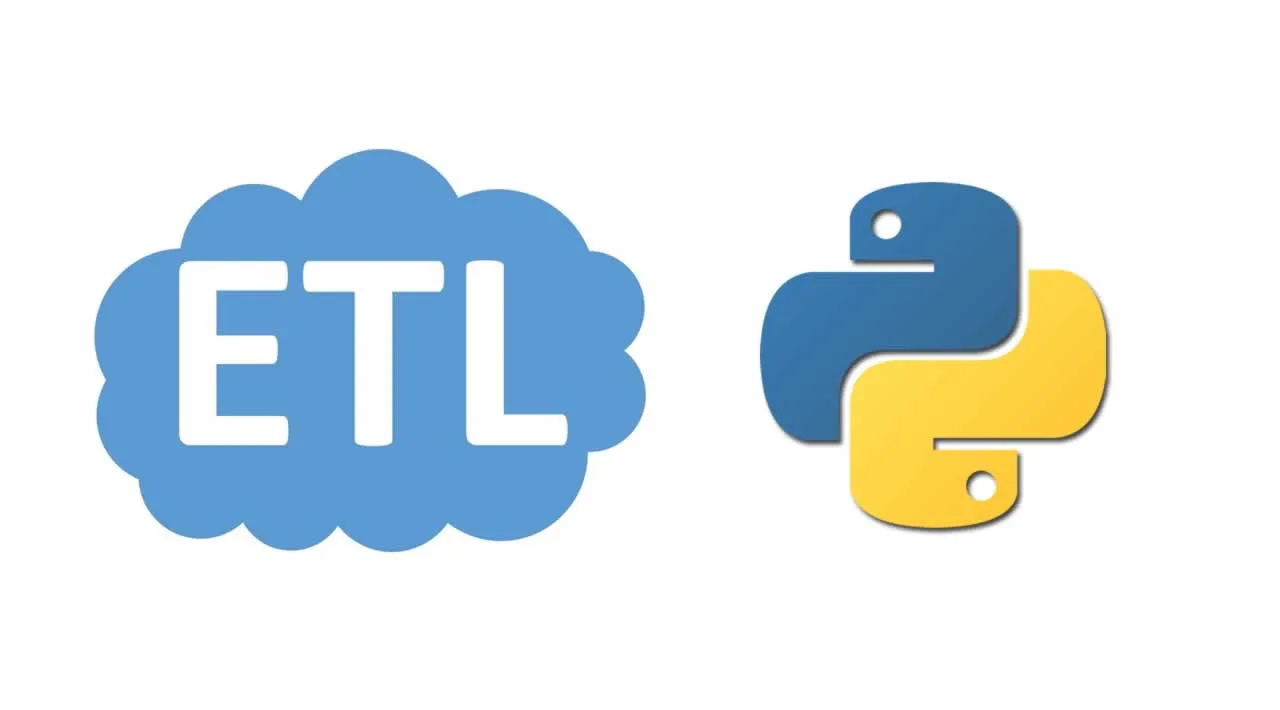

## 1- Escrapeamos ESPN para obtener las estadísticas de todos los jugadores 

https://espndeportes.espn.com/basquetbol/nba/estadisticas/jugador

In [1]:
from selenium import webdriver 

import time  

import requests as req

from bs4 import BeautifulSoup as bs

import pandas as pd

from webdriver_manager.chrome import ChromeDriverManager

from random import randint

In [2]:
PATH=ChromeDriverManager().install()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\HP\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [3]:
driver=webdriver.Chrome(PATH)
list_temps = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
html = []

# Creamos un bucle para sacar toda la información de todas las temporadas
for temp in list_temps:
    
    driver.get('https://espndeportes.espn.com/basquetbol/nba/estadisticas/jugador/_/temporada/{}/tipodetemporada/2'.format(temp))
    time.sleep(2)
    
    # Aceptamos las cookies
    try:
        driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click() 
        time.sleep(2)
    except:
        print('No cookies')
        
    # Bucle para darle al botón mostrar más
    while 1:
        
        try:
            driver.find_element_by_xpath('//*[@id="fittPageContainer"]/div[3]/div/div/section/div/div[3]/div[2]/a').click()
            time.sleep(randint(2, 5))
        except:
            break
    
    # Guardamos el html de todas las temporadas en una lista
    html.append(bs(driver.page_source, 'html.parser'))
    time.sleep(2)

driver.quit() # Apagamos el driver

C:\Users\HP\AppData\Local\Temp/ipykernel_12352/4285452240.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)
C:\Users\HP\AppData\Local\Temp/ipykernel_12352/4285452240.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click()
C:\Users\HP\AppData\Local\Temp/ipykernel_12352/4285452240.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="fittPageContainer"]/div[3]/div/div/section/div/div[3]/div[2]/a').click()


No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies
No cookies


In [4]:
len(html) # Temporadas que hemos cogido

20

In [5]:
# Condensamos todas las tablas

html_table = []

for i in range(20):

    html_table.append(html[i].find_all('div', class_= 'Wrapper Card__Content')[0])

In [6]:
# Creamos una lista con las temporadas

temporadas = []

for i in range(len(html_table)):
    
    temporadas.append(html_table[i].find('h1', class_='headline headline__h1 dib').text[36:45])

# Creamos la lista de jugadores 

players_by_temp = []

for i in range(20):
    
    players = [j.text for j in html_table[i].find_all(class_='AnchorLink')]
    
    players_by_temp.append(players)

# Creamos una lista de los equipos

team_by_temp = []

for i in range(20):
    
    team = [j.text for j in html_table[i].find_all(class_='pl2 n10 athleteCell__teamAbbrev')]
    
    team_by_temp.append(team)

In [7]:
# Nos quedamos solo con el body derecho de la tabla 

html_statistics = []

for i in range(20):

    html_statistics.append(html_table[i].find_all('tbody', class_= 'Table__TBODY')[1])

In [8]:
# Nos quedamos solo con las filas

filas_by_temp = []

for i in range(20):
    
    filas_by_temp.append(html_statistics[i].find_all('tr'))

In [9]:
cols = ['POS', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO', 'DD2', 'TD3', 'PER']


def statics_by_temp(n):
    
    ''' Esta función sirve para sacar las estadísticas de los jugadores 
        por temporada donde n indica el índice de la temporada: 
        
        n = 0 -> temp 2001-02
        n = 19 -> temp 2020-21'''
    
    results = []
    for row in filas_by_temp[n]:

            table_data = row.find_all('td')
            if table_data:
                results.append([data.text for data in table_data])

    df = pd.DataFrame(results, columns = cols)
    
    # Añadimos al df las columnas sacadas anteriormente
    
    df['TEMP'] = temporadas[n]
    df['PLAYER'] = players_by_temp[n][:len(df)]
    df['TEAM'] = team_by_temp[n][:len(df)]
    
    return df

In [10]:
statics_by_temp(0).head()

,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,AST,STL,BLK,TO,DD2,TD3,PER,TEMP,PLAYER,TEAM
0,E,60,43.7,31.4,11.1,27.8,39.8,1.3,4.5,29.1,...,5.5,2.8,0.2,4.0,4,1,0.00,2001-02,Allen Iverson,PHI
1,C,67,36.1,27.2,10.6,18.3,57.9,0.0,0.0,0.0,...,3.0,0.6,2.0,2.6,40,0,0.00,2001-02,Shaquille O'Neal,LAL
2,SF,82,40.3,26.1,8.6,19.5,44.2,2.6,6.3,40.4,...,3.2,1.9,1.0,2.9,17,0,0.00,2001-02,Paul Pierce,BOS
3,E,76,38.3,25.6,9.4,20.9,45.1,1.4,3.7,36.4,...,5.3,1.6,1.0,2.5,24,1,0.00,2001-02,Tracy McGrady,ORL
4,C,82,40.6,25.5,9.3,18.3,50.8,0.0,0.1,10.0,...,3.7,0.7,2.5,3.2,67,0,0.00,2001-02,Tim Duncan,SA


In [11]:
# Concatenamso todos los dataframes para tener condensados todos los datos en un df solo

df_players = pd.concat([statics_by_temp(0), statics_by_temp(1), statics_by_temp(2), statics_by_temp(3), 
                       statics_by_temp(4), statics_by_temp(5), statics_by_temp(6), statics_by_temp(7),
                       statics_by_temp(8), statics_by_temp(9), statics_by_temp(10), statics_by_temp(11),
                       statics_by_temp(12), statics_by_temp(13), statics_by_temp(14), statics_by_temp(15),
                       statics_by_temp(16), statics_by_temp(17), statics_by_temp(18), statics_by_temp(19)])

In [12]:
df_players = df_players.reset_index(drop=True) # Reseteamos los índices del df

df_players.tail()

,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,AST,STL,BLK,TO,DD2,TD3,PER,TEMP,PLAYER,TEAM
9007,SF,6,2.5,0.5,0.2,0.7,25.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0,0,1.08,2020-21,Brian Bowen II,IND
9008,PG,8,2.0,0.4,0.0,0.5,0.0,0.0,0.1,0.0,...,0.1,0.0,0.0,0.4,0,0,-10.75,2020-21,Jared Harper,NY
9009,G,7,2.6,0.3,0.1,1.1,12.5,0.0,0.3,0.0,...,0.3,0.0,0.0,0.0,0,0,-6.47,2020-21,Jaylen Adams,MIL
9010,SF,13,3.8,0.2,0.1,0.5,14.3,0.0,0.4,0.0,...,0.2,0.1,0.0,0.3,0,0,-7.09,2020-21,Terrance Ferguson,PHI
9011,G,17,2.0,0.1,0.1,0.5,11.1,0.0,0.5,0.0,...,0.1,0.0,0.0,0.1,0,0,-8.03,2020-21,Theo Pinson,NY


In [13]:
# Exportamos a csv el DataFrame

df_players.to_csv(r'C:\Users\HP\Dropbox\Mi PC (DESKTOP-KE4BQ28)\Desktop\Proyecto ETL NBA Bootcamp\players_statics.csv', index = False)

## 2- De Kaggle cogemos el DataSet de jugadores (ampliamos infromación respecto al df anterior)

https://www.kaggle.com/justinas/nba-players-data

In [14]:
df_players_2 = pd.read_csv(r'C:\Users\HP\Dropbox\Mi PC (DESKTOP-KE4BQ28)\Desktop\Proyecto ETL NBA Bootcamp\Datos iniciales\all_seasons.csv')

df_players_2.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [15]:
df_players_2.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [16]:
# Eliminamos columnas qu no nos amplian información adicional respecto al df anterior

df_players_2 = df_players_2.drop(['Unnamed: 0', 'gp', 'pts', 'reb', 'ast'], axis = 1)

df_players_2.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
       'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [17]:
# Renombramos columnas

df_players_2.columns = ['PLAYER', 'TEAM', 'AGE', 'HEIGHT', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT_YEAR', 
                        'DRAFT_ROUND', 'DRAFT_NUMBER', 'NET_RATING', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%', 'TEMP']

df_players_2.columns

Index(['PLAYER', 'TEAM', 'AGE', 'HEIGHT', 'WEIGHT', 'COLLEGE', 'COUNTRY',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'NET_RATING', 'OREB%',
       'DREB%', 'USG%', 'TS%', 'AST%', 'TEMP'],
      dtype='object')

In [18]:
# Eliminamos las temporadas anteriores a la 2001-02

df_players_2 = df_players_2[df_players_2.TEMP >= '2001-02']

df_players_2.shape

(9502, 17)

In [19]:
df_players_2.head()

,PLAYER,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB%,DREB%,USG%,TS%,AST%,TEMP
2198,Tim Duncan,SAS,26.0,213.36,117.933920,Wake Forest,US Virgin Islands,1997,1,1,8.7,0.097,0.257,0.291,0.576,0.182,2001-02
2199,Tim Hardaway,DEN,35.0,182.88,88.450440,Texas-El Paso,USA,1989,1,14,-1.7,0.010,0.077,0.217,0.492,0.283,2001-02
2200,Tim James,PHI,25.0,200.66,96.161504,Miami (FL),USA,1999,1,25,-22.5,0.119,0.074,0.197,0.384,0.048,2001-02
2201,Tim Thomas,MIL,25.0,208.28,108.862080,Villanova,USA,1997,1,7,1.2,0.039,0.132,0.225,0.522,0.091,2001-02
2202,Todd MacCulloch,NJN,26.0,213.36,127.005760,Washington,Canada,1999,2,47,6.3,0.114,0.158,0.175,0.562,0.078,2001-02


In [20]:
# Exportamos a csv el DataFrame

df_players_2.to_csv(r'C:\Users\HP\Dropbox\Mi PC (DESKTOP-KE4BQ28)\Desktop\Proyecto ETL NBA Bootcamp\players_statics_2.csv', index = False)

## 3- Escrapeamos Hoopshype para obtener los salarios de los jugadores

https://hoopshype.com/salaries/players/

In [21]:
driver=webdriver.Chrome(PATH)

list_seasons = ['2001-2002', '2002-2003', '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
                '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021']
html_salary = []

# Creamos un bucle para sacar los salarios de los jugadores de todas las temporadas

for season in list_seasons:
    
    driver.get('https://hoopshype.com/salaries/players/{}/'.format(season))
    time.sleep(2)
    
    html_salary.append(bs(driver.page_source, 'html.parser'))
    time.sleep(2)

driver.quit() # Apagamso el driver

C:\Users\HP\AppData\Local\Temp/ipykernel_12352/2491460220.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)


In [22]:
len(html_salary)

20

In [23]:
# Creamos una lista para los jugadores

players_by_temp_2 = []

for i in range(20):
    
    players = [j.text.strip() for j in html_salary[i].find_all('td', class_='name')]
    
    players_by_temp_2.append(players)
    
# Creamos una lista para los salarios

salaries_by_temp = []

for i in range(20):
    
    salary = [j.text.strip() for j in html_salary[i].find_all('td', class_='hh-salaries-sorted')]
    
    salaries_by_temp.append(salary)

In [24]:
# Eliminamos las cabeceras para quedarnos solo con los jugadores y los salarios

players_not_header = []

for i in range(20):
    
    players_not_header.append(players_by_temp_2[i][1:])
    
salaries_not_header = []
    
for i in range(20):
    
    salaries_not_header.append(salaries_by_temp[i][1:])

In [25]:
def salaries_by_temp(n):
    
    ''' Esta función sirve para sacar los salarios de los jugadores 
        por temporada donde n indica el índice de la temporada: 
        
        n = 0 -> temp 2001-02
        n = 19 -> temp 2020-21'''
    
    df = pd.DataFrame(list(zip(players_not_header[n], salaries_not_header[n])), columns = ['PLAYER', 'SALARY'])
    
    df['TEMP'] = temporadas[n] # Añadimos la columna de la temporada
    
    return df

In [26]:
salaries_by_temp(0).head()

,PLAYER,SALARY,TEMP
0,Kevin Garnett,"$22,400,000",2001-02
1,Shaquille O'Neal,"$21,428,572",2001-02
2,Alonzo Mourning,"$18,754,800",2001-02
3,Juwan Howard,"$18,750,000",2001-02
4,Scottie Pippen,"$18,083,564",2001-02


In [27]:
df_salary = pd.concat([salaries_by_temp(0), salaries_by_temp(1), salaries_by_temp(2), salaries_by_temp(3), 
                       salaries_by_temp(4), salaries_by_temp(5), salaries_by_temp(6), salaries_by_temp(7),
                       salaries_by_temp(8), salaries_by_temp(9), salaries_by_temp(10), salaries_by_temp(11),
                       salaries_by_temp(12), salaries_by_temp(13), salaries_by_temp(14), salaries_by_temp(15),
                       salaries_by_temp(16), salaries_by_temp(17), salaries_by_temp(18), salaries_by_temp(19)])

df_salary.shape

(9903, 3)

In [28]:
df_salary = df_salary.reset_index(drop=True) # Reseteamos índices

df_salary.tail()

,PLAYER,SALARY,TEMP
9898,Cam Reynolds,"$33,299",2020-21
9899,Andrew White,"$25,000",2020-21
9900,Tyler Hall,"$25,000",2020-21
9901,Elijah Bryant,"$24,611",2020-21
9902,Caleb Homesley,"$20,000",2020-21


In [29]:
# Exportamos los datos

df_salary.to_csv(r'C:\Users\HP\Dropbox\Mi PC (DESKTOP-KE4BQ28)\Desktop\Proyecto ETL NBA Bootcamp\players_salary.csv', index = False)